In [1]:
import pkfire.dist_lib.dist as dlib
from pkfire.ptl_lib.particle import Particles
from pkfire.pkfire import Pkfire, XPkfire
from pkfire.grid_lib.grid import Grid
from pkfire.movie_lib.movie_super import Movie
import numpy as np
import matplotlib.pyplot as plt

In [2]:
il = dlib.Illustris('/Users/cosinga/illustris/L75n1820TNG/output/', 99)


In [3]:
mask = il.maskMass()
mass = il.getMass()
himass = np.copy(mass) * 0.1
pos = il.getPos()

grpmass = il.getGroupMass()
gmass_mean = np.mean(grpmass)
gmass_stdev = np.std(grpmass)
gmass_min = gmass_mean + gmass_stdev * 5
top_gmass_mask = il.maskGroupMass(mass_min = gmass_min)
gmass_idx_list = np.where(top_gmass_mask)[0]

print(len(gmass_idx_list))
gmass_sub_mask = np.zeros_like(mask, dtype = bool)
for idx in gmass_idx_list:
    haloid_mask = il.maskHalo(idx)
    gmass_sub_mask = gmass_sub_mask | haloid_mask

gmass_sub_mask = gmass_sub_mask & mask

877


In [5]:
pkflist = []
gridshape = [100] * 3
nframes = 10

gals_stmass = Particles(pos, mass)
stgrid = Grid(gridshape, il.getBox())
stpkf = Pkfire(stgrid, gals_stmass)

for i in range(nframes):
    gals_hi = Particles(pos, himass)
    higrid = Grid(gridshape, il.getBox())
    hipkf = Pkfire(higrid, gals_hi)
        
    xpkf = XPkfire(stpkf, hipkf)
    pkflist.append(xpkf)
    
    himass[gmass_sub_mask] *= 0.5
    

In [8]:
def plot(pkf):
    ncols = 4
    wspace = 0.2
    wrs = np.ones(ncols)
    wrs[-1] = 0.15
    fig, axes = Movie._makeFig(ncols, width_ratios = wrs, gspec_kw = {'wspace':wspace})
    
    xsthi.pkPlot(axes[0])
    xsthi.obsbiasPlot(axes[1])
    stpkf.ptlPlot(axes[2], axes[3])
    
    axes[0].set_ylabel('P (k) (h / cMpc)$^3$', fontsize = 12)
    axes[1].set_ylabel('b (k)')
    axes[2].set_xlabel('x (cMpc / h)')
    axes[2].set_ylabel('y (cMpc / h)')
    axes[3].set_ylabel('M (M$_\\odot$)')
    fig.text(0.5, 0, 'k (h / cMpc)', fontsize = 12, ha = 'center', va = 'bottom')
    for ax in axes:
        ax.tick_params(direction = 'in')
    return fig, axes

In [9]:
movie = Movie(xpkf, 1)
movie.run(pkflist, plot, "/Users/cosinga/code/hcolor/fig_md_analysis/pres_movies/")

making frame 0

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 11.45
Time taken = 11.47 seconds

Computing correlation function of the field...
Time to complete loop = 5.52
Time taken = 12.58 seconds


TypeError: _makeFig() missing 1 required positional argument: 'ncols'

In [7]:
xsthi.pk()


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 11.87
Time taken = 11.91 seconds


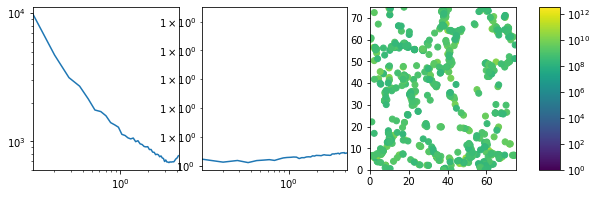